# **A/B Testing of Campaign Impact in Bank**

a. Name experiment: A/B Test for Marketing Research purpose of Campaign Impact in Bank

b. Define hypothesis: Higher number of campaigns will increase the conversion rate

c. Participant: The client who has been campaigned (at least once) by the bank

d. Variable tested: Lower campaigned client and Higher campaigned client

e. Metrics: Conversion rate of of clients whi subscribe a term deposit

f. Sample size: 800 samples

In [305]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp

In [222]:
dft = pd.read_csv('bank-full.csv', sep =';')
dft

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [232]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [323]:
dft['duration'].max()

4918

In [229]:
print('Campaign unique value:', dft['campaign'].unique())
print('Median:', dft['campaign'].median())

Campaign unique value: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Median: 2.0


In [256]:
segment_campaign = []

for index, column in dft.iterrows():
    median = dft['campaign'].median()
    
    if column['campaign'] > median:
        segment_campaign.append('High')
    else:
        segment_campaign.append('Low')

dft['segment_campaign'] = segment_campaign

dft.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,segment_campaign,subs_termdepo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Low,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Low,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Low,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Low,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Low,0


In [281]:
dft['subs_termdepo'] = np.where(dft['y'] == 'yes', 1, 0)
dft['subs_termdepo'] = dft['subs_termdepo'].astype(np.int64)

dft.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,segment_campaign,subs_termdepo
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,High,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Low,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,High,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,High,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,Low,0


**Sampling for Each Group / Stratified Random Sampling**

In [312]:
dft.groupby(['segment_campaign'],as_index=False).count()

,segment_campaign,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,subs_termdepo
0,High,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162
1,Low,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049


In [315]:
dft_sample = dft.groupby(['segment_campaign']).apply(lambda x: x.sample(n=400,random_state=123))

dft_sample

age          job   marital  education default  \
segment_campaign                                                        
High             16172   34  blue-collar    single  secondary      no   
                 23147   36   technician    single  secondary     yes   
                 27553   58   management   married   tertiary      no   
                 18959   31   management   married   tertiary      no   
                 8660    35       admin.    single  secondary      no   
...                     ...          ...       ...        ...     ...   
Low              15266   57   management  divorced   tertiary      no   
                 24069   58   management  divorced   tertiary      no   
                 16618   41       admin.   married  secondary      no   
                 37760   51  blue-collar    single  secondary      no   
                 36404   52     services  divorced  secondary      no   

                        balance housing loan    contact  day month  duration  \
segment_campaign                                                               
High             16172     -199      no   no   cellular   22   jul        78   
                 23147        0      no  yes   cellular   26   aug       109   
                 27553     1602      no   no   cellular   21   nov      1032   
                 18959      859     yes  yes   cellular    4   aug       182   
                 8660      2201     yes   no    unknown    3   jun       354   
...                         ...     ...  ...        ...  ...   ...       ...   
Low              15266     2549      no   no   cellular   17   jul       193   
                 24069    26254     yes   no    unknown   21   oct        49   
                 16618     2661     yes   no  telephone   24   jul       258   
                 37760      708     yes   no  telephone   14   may       391   
                 36404        0     yes   no   cellular   11   may       243   

                        campaign  pdays  previous poutcome   y  \
segment_campaign                                                 
High             16172        10     -1         0  unknown  no   
                 23147        14     -1         0  unknown  no   
                 27553        10    115         3  failure  no   
                 18959         3     -1         0  unknown  no   
                 8660          3     -1         0  unknown  no   
...                          ...    ...       ...      ...  ..   
Low              15266         2     -1         0  unknown  no   
                 24069         1     -1         0  unknown  no   
                 16618         1     -1         0  unknown  no   
                 37760         1    364         1  failure  no   
                 36404         2     -1         0  unknown  no   

                       segment_campaign  subs_termdepo  
segment_campaign                                        
High             16172             High              0  
                 23147             High              0  
                 27553             High              0  
                 18959             High              0  
                 8660              High              0  
...                                 ...            ...  
Low              15266              Low              0  
                 24069              Low              0  
                 16618              Low              0  
                 37760              Low              0  
                 36404              Low              0  

[800 rows x 19 columns]

In [317]:
dft_sample['segment_campaign'].value_counts()

High    400
Low     400
Name: segment_campaign, dtype: int64

In [318]:
highercamp = dft_sample[dft_sample['segment_campaign']=='High']
lowercamp = dft_sample[dft_sample['segment_campaign']=='Low']

highercamp['subs_termdepo'].value_counts()

0    363
1     37
Name: subs_termdepo, dtype: int64

In [319]:
n_success_highercamp = highercamp['subs_termdepo'].sum()
n_success_lowercamp = lowercamp['subs_termdepo'].sum()

n_obs_highercamp = highercamp['subs_termdepo'].count()
n_obs_lowercamp = lowercamp['subs_termdepo'].count()

print('Number of success higher campaign:',n_success_highercamp)
print('Number of success lower campaign:',n_success_lowercamp)

Number of success higher campaign: 37
Number of success lower campaign: 65


In [334]:
highcampaign_conversionrate = n_success_highercamp/n_obs_highercamp
lowcampaign_conversionrate = n_success_lowercamp/n_obs_lowercamp

print('Conversion Rate from High Campaign : {:0.4f}%'.format(highcampaign_conversionrate*100))
print('Conversion Rate from Low Campaign : {:0.4f}%'.format(lowcampaign_conversionrate*100))

Conversion Rate from High Campaign : 9.2500%
Conversion Rate from Low Campaign : 16.2500%


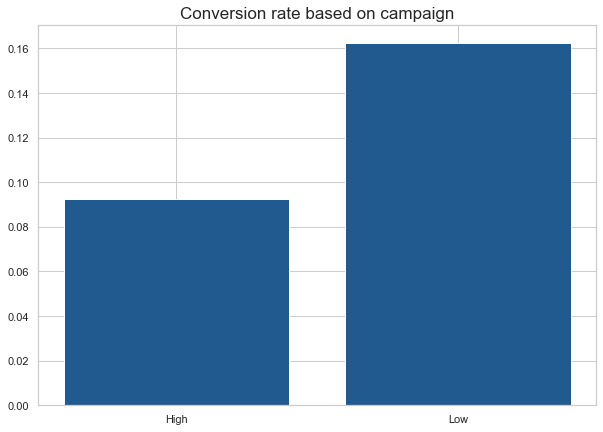

In [321]:
plt.figure(figsize = (10,7))
x = ['High','Low']
value = [highcampaign_conversionrate,lowcampaign_conversionrate]
plt.bar(x,value)
plt.title('Conversion rate based on campaign', fontsize = 17);

*The hipotesis testing is need to find whether the difference is significance or not*

# Hypothetical Testing

**a. Hypothesis**

H0: Conversion rate of lower number of campaigns = conversion rate of higher campaigns

H1: Conversion rate of lower number of campaigns ≠ conversion rate of higher campaigns

**b. Test used**

Z-test

**c. Detect assumption**


In [324]:
success = np.array([n_success_highercamp,n_success_lowercamp])
obs = np.array([n_obs_highercamp,n_obs_lowercamp])

In [325]:
stats,pvalue = sp.proportions_ztest(success,obs)

stats

-2.9680774381505555

In [326]:
pvalue

0.002996688231436852

In [327]:
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.0030
Sufficient to reject H0


**d. Result test**

P-value = 0.003 < alpha = 0.05 (reject H0)

**e. Interpretation**

- It is conluded that conversion rate with higher number of campaign is not equal with to the lesser one.

- As solution for business team, the different campaign rate given will affect significantly to the conversion rate of depo user in a bank.